In [1]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '../../Data/SimOut032118_genomics/'

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges

Attaching package: ‘IRanges’

The follo

In [2]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
ncls <- c()
rs <- c()
k<-1
for (i in 1:(length(flst))) {
    load(paste0(dataDir,flst[i]))
    if (CellPop$totalCount==1) {
        ncls[[k]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        ncls[[k]] <- sum(vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1)))
    }
    rs[[k]] <- CellPop$Get('r')
    rm('CellPop')
    k <- k+1
    
}

In [3]:
rs_var <- c()
rs_mean <- c()
ncells_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
    }
    ncells_var[i] <- var(ncls[[i]])

}

In [4]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [5]:
ncls

[1] 16307 16358 15759 15904 16121 16359 16133 16162 15772 16171 16367 16133
[13] 16056 17626 16147 19277 15413 16082 16026 15932 16472    16    16    16
[25]    16

In [6]:
matrix(ncls[1:20],nrow=4,ncol=5,byrow=TRUE)

16307,16358,15759,15904,16121
16359,16133,16162,15772,16171
16367,16133,16056,17626,16147
19277,15413,16082,16026,15932


In [7]:
matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE)

0.9899725,0.9917382,0.9865572,0.9817480,0.9773799
0.9949466,0.9889942,0.9865364,0.9819192,0.9842637
0.9990326,0.9895837,0.9873509,1.0869147,0.9870261
1.4062675,0.9805559,1.0071581,0.9865929,0.9833539


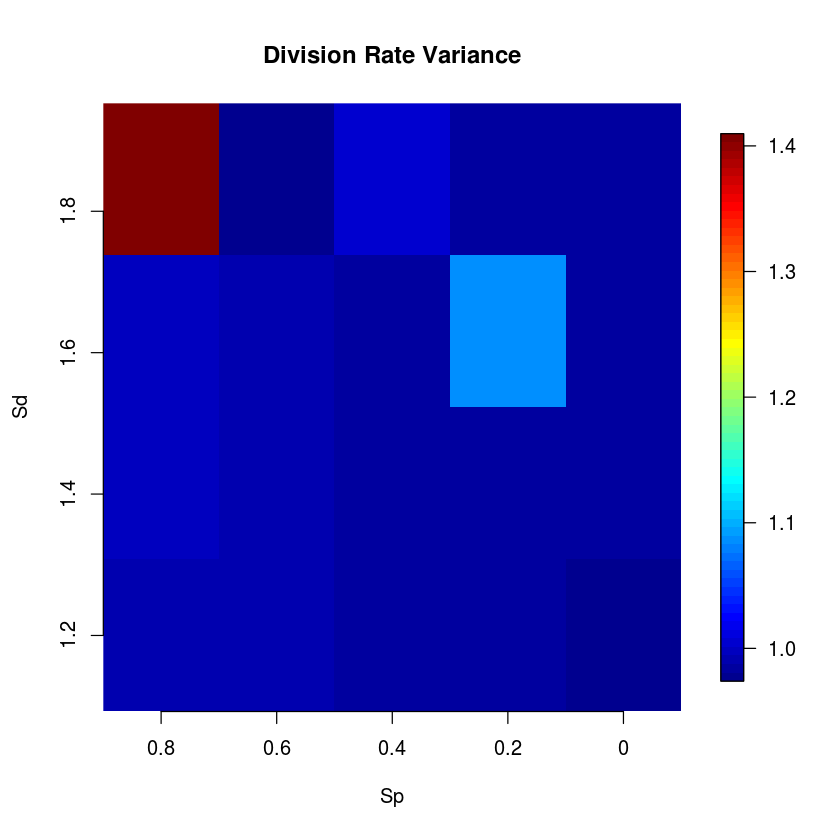

In [8]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Division Rate Variance",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.31), labels=seq(1.2,1.8,0.2)); 


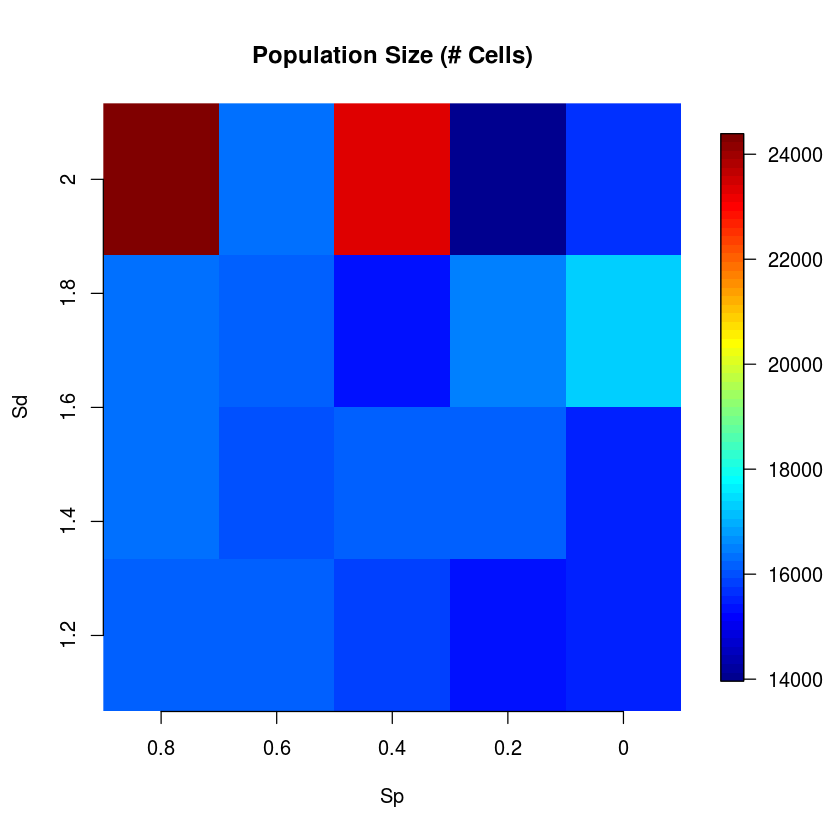

In [29]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(ncls[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size (# Cells)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.25), labels=seq(1.2,2.0,0.2)); 